In [1]:
import axelrod as axl
import numpy as np

import opt_mo
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pandas as pd
from scipy import stats

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [4]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [5]:
df = opt_mo.tools.read_sql_data_frame('../data/without_gambler/main_seed_two.db')

In [6]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,...,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000
mean,1109.802191,0.475595,0.493879,0.499018,0.499848,0.507419,0.502015,0.501678,0.502147,0.265706,...,3.391966,0.045327,0.087495,0.045327,0.087495,0.047365,0.024647,0.047365,0.024647,1.237371
std,779.857689,0.287508,0.284907,0.291968,0.287819,0.286922,0.285854,0.284311,0.287121,0.407787,...,49.084528,0.205749,0.199886,0.205749,0.199886,0.211457,0.080108,0.211457,0.080108,3.775476
min,0.000000,0.000454,0.000426,0.000538,0.000051,0.000075,0.000210,0.000403,0.000588,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,410.500000,0.224612,0.242256,0.241291,0.254955,0.257772,0.259718,0.262331,0.250413,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1037.000000,0.464149,0.496157,0.500473,0.490587,0.502396,0.512489,0.503408,0.503697,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1610.500000,0.725560,0.726267,0.750889,0.751338,0.754651,0.739560,0.743532,0.759717,0.549272,...,1.000000,0.000000,0.026905,0.000000,0.026905,0.000000,0.000000,0.000000,0.000000,1.000000
max,2567.000000,0.999764,0.999311,0.999550,0.999766,0.999834,0.999653,0.999129,0.998740,1.000000,...,1801.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999917,1.000000,0.999917,151.000000


In [7]:
df.exp_index.tail()

1638    2563
1639    2564
1640    2565
1641    2566
1642    2567
Name: exp_index, dtype: int64

In [8]:
color = matplotlib.cm.viridis(0.3)

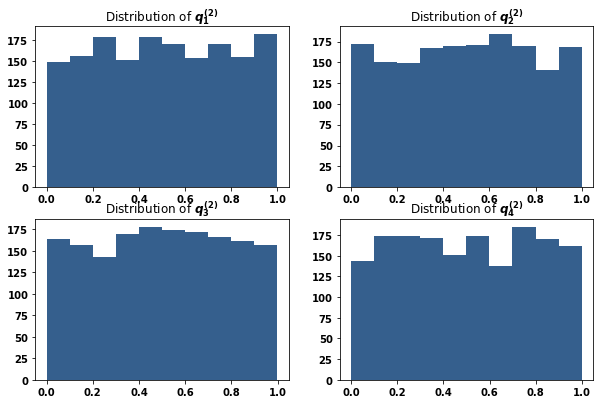

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    #axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=colors[0], label='$q^{(1)}$')
    axes[index].hist(df['second_opponent_q_{}'.format(i + 1)], color=color);
    
    axes[index].set_title('Distribution of $q^{(2)}_%s$' % (i + 1))

plt.savefig('../img/second_opponent_probabilities.pdf')

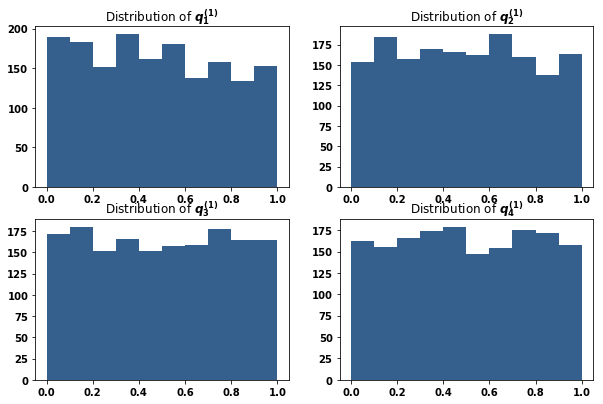

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=color)
    
    axes[index].set_title('Distribution of $q^{(1)}_%s$' % (i + 1))

plt.savefig('../img/first_opponent_probabilities.pdf')

In [11]:
df["SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)

In [12]:
bg_color = '#002B36'
color = '#FDF6E3'

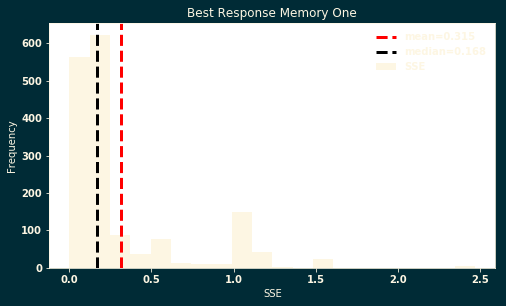

In [19]:
fig, axes = plt.subplots(figsize=(8, 4.5), facecolor=bg_color)

axes.hist(df["SSerror"], bins=20, color=color, label='SSE');
axes.axvline(
    np.mean(df["SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(df["SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 2.5, 6))
axes.set_xlabel('SSE', color=color)
axes.set_ylabel('Frequency', color=color)
axes.axvline(
    np.median(df["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["SSerror"]), 3),
)
l = axes.legend(framealpha=0)
for text in l.get_texts():
    text.set_color(color)

axes.spines['bottom'].set_color(color)
axes.spines['top'].set_color(color)
axes.spines['right'].set_color(color)
axes.spines['left'].set_color(color)
axes.xaxis.label.set_color(color)
axes.tick_params(axis='x', colors=color)
axes.tick_params(axis='y', colors=color)
axes.set_title('Best Response Memory One', color=color)

fig.savefig("/Users/silversurfer/Documents/src/talks/talks/social dilemmas talk/static/result_best_response.pdf",
            transparent=True, facecolor=fig.get_facecolor())

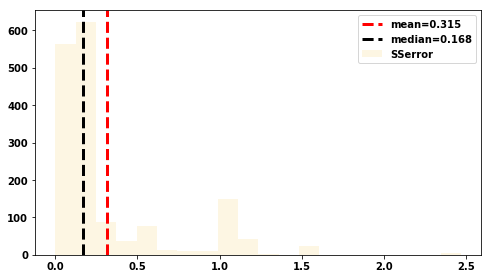

In [14]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(df["SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(df["SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(df["SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 2.5, 6))

axes.axvline(
    np.median(df["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["SSerror"]), 3),
)
axes.legend();

plt.savefig('../img/best_respones_sserror.pdf')

In [69]:
def describe(df, stats):
    d = df.describe(percentiles=[.05, .25, .30, .35, .5, .95])
    return d.append(df.reindex_axis(d.columns, 1).agg(stats))

In [70]:
sserror_table = pd.DataFrame(describe(df, ['median', 'skew', 'kurt'])['SSerror'])
with open("../tex/sserror_table.tex", "w") as f:
    f.write(sserror_table.to_latex())

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
sserror_table

,SSerror
count,1643.000000
mean,0.315173
std,0.376325
min,0.000000
5%,0.011068
25%,0.075948
30%,0.104707
35%,0.126840
50%,0.168275
95%,1.058824


**Best response Evolutionary memory one (Evo)**

In [72]:
df["Evo SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)

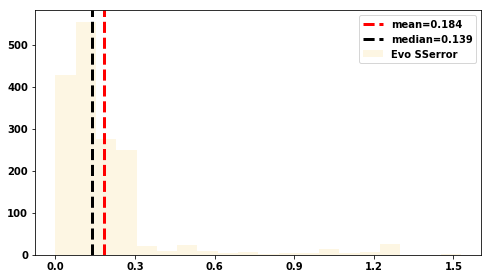

In [73]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(df["Evo SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(df["Evo SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(df["Evo SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 1.5, 6))
axes.axvline(
    np.median(df["Evo SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["Evo SSerror"]), 3)
)
axes.legend();

plt.savefig('../img/evo_sserror.pdf')

In [74]:
evo_sserror_table = pd.DataFrame(pd.DataFrame(describe(df, ['median', 'skew', 'kurt'])['Evo SSerror']))
evo_sserror_table.iloc[3] = round(evo_sserror_table.iloc[3], 3)
with open("../tex/evo_sserror_table.tex", "w") as f:
    f.write(evo_sserror_table.to_latex())

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
evo_sserror_table

,Evo SSerror
count,1643.000000
mean,0.183524
std,0.216175
min,0.000000
5%,0.015543
25%,0.073650
30%,0.094743
35%,0.111698
50%,0.138574
95%,0.529412


In [76]:
from scipy import stats

- Sample distributions are equal. **Fail to Reject $h_0$**

- Sample distributions are not equal. **Reject $h_0$** 

In [77]:
def t_test(sample_one, sample_two, alpha=0.05):
    t, p = stats.ttest_ind(sample_one, sample_two)
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
        
    return p

In [78]:
def test_ranksum(sample_one, sample_two, alpha=0.05):
    _, p = stats.ranksums(df['SSerror'], df['Evo SSerror'])
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
    return p

In [79]:
p = t_test(df['SSerror'], df['Evo SSerror'])

Reject $h_0$


In [80]:
round(p, 10)

0.0

In [81]:
p = test_ranksum(df['SSerror'], df['Evo SSerror'])

Reject $h_0$


In [82]:
round(p, 12)

0.0

**The actual behaviour**

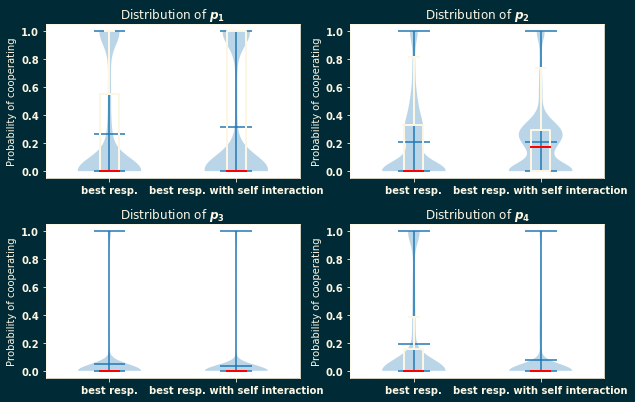

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5), facecolor=bg_color)

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )
    boxes = axes[index].boxplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color(color)
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color(color)
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color(color)
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium', color=color)
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium', color=color)
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best resp.", "best resp. with self interaction"])
    

    axes[index].spines['bottom'].set_color(color)
    axes[index].spines['top'].set_color(color)
    axes[index].spines['right'].set_color(color)
    axes[index].spines['left'].set_color(color)
    axes[index].xaxis.label.set_color(color)
    axes[index].tick_params(axis='x', colors=color)
    axes[index].tick_params(axis='y', colors=color)

fig.savefig("/Users/silversurfer/Documents/src/talks/talks/social dilemmas talk/static/result_self_interactions.pdf",
            transparent=True, facecolor=fig.get_facecolor())

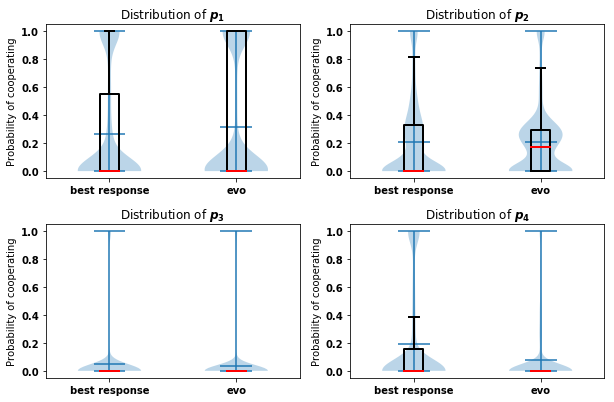

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )
    boxes = axes[index].boxplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium')
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium')
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "evo"])
    
plt.savefig('../img/behaviour_violin_plots.pdf')

In [84]:
means = []
for i in range(4):
    means.append((np.median(df['mem_one_p_{}'.format(i + 1)]),
                  np.median(df['evol_mem_one_p_{}'.format(i + 1)]),
                  round(test_ranksum(df['mem_one_p_{}'.format(i + 1)], df['evol_mem_one_p_{}'.format(i + 1)]), 3)))

Reject $h_0$
Reject $h_0$
Reject $h_0$
Reject $h_0$


In [85]:
tests_table = pd.DataFrame(means, columns=['Memory one Median', 'Evo Median', 'p-values'])

In [86]:
tests_table.index = ['Distribution $p_1$', 'Distribution $p_2$', 'Distribution $p_3$', 'Distribution $p_4$']

In [87]:
tests_table

,Memory one Median,Evo Median,p-values
Distribution $p_1$,0.0,0.000000,0.0
Distribution $p_2$,0.0,0.173727,0.0
Distribution $p_3$,0.0,0.000000,0.0
Distribution $p_4$,0.0,0.000000,0.0


In [130]:
with open("../tex/medians_tests.tex", "w") as f:
    f.write(tests_table.to_latex().replace('\$', '$').replace('\_', '_'))

In [33]:
distances = [
    [
        (row["evol_mem_one_p_{}".format(p + 1)] - row["mem_one_p_{}".format(p + 1)])
        for _, row in df.iterrows()
    ]
    for p in range(4)
]

In [34]:
labels = ["$p_1$", "$p_2$", "$p_3$", "$p_4$"]

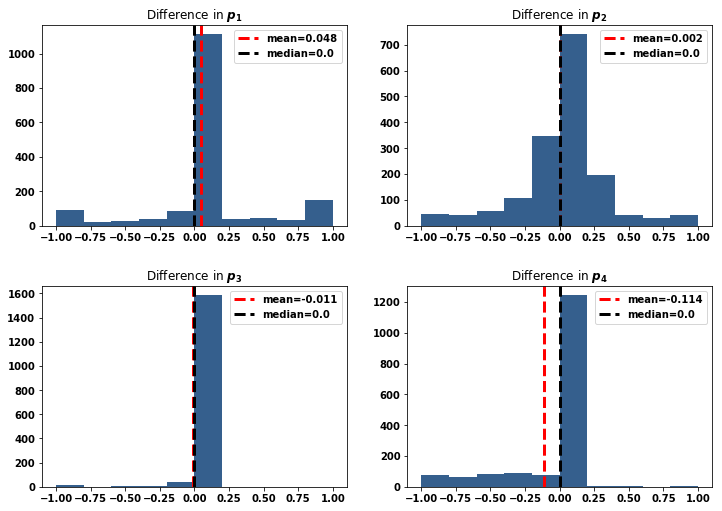

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].hist(distance, color=color)
    axes[index].axvline(
        np.mean(distance), color="red", linestyle="dashed", linewidth=3,
        label="mean=%s" % round(np.mean(distance), 3)
    )
    axes[index].axvline(
        np.median(distance),
        color="black",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(distance), 3),
    )
    axes[index].set_title("Difference in %s" %labels[i])
    axes[index].legend()
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)
    
plt.savefig('../img/distances.pdf')

In [110]:
skew = []
kurt = []
for distance in distances:
    skew.append(stats.skew(distance))
    kurt.append(stats.kurtosis(distance))
    


In [123]:
skew_table = pd.DataFrame({'Skewness': skew, 'Kurtosis': kurt})
skew_table.index = [r'Difference in $p_1$', r'Difference in $p_2$', r'Difference in $p_3$',
                    r'Difference in $p_4$']

In [124]:
skew_table 

,Skewness,Kurtosis
Difference in $p_1$,0.155659,1.845893
Difference in $p_2$,-0.124756,2.717163
Difference in $p_3$,-6.766827,79.624372
Difference in $p_4$,-1.906567,3.759093


In [129]:
with open("../tex/skew_table.tex", "w") as f:
    f.write(skew_table.to_latex().replace('\$', '$').replace('\_', '_'))

**Regression**

In [40]:
import seaborn as sbn
from sklearn.linear_model import LinearRegression

In [41]:
correlation = df[df.columns[1:-16]].corr().round(2)

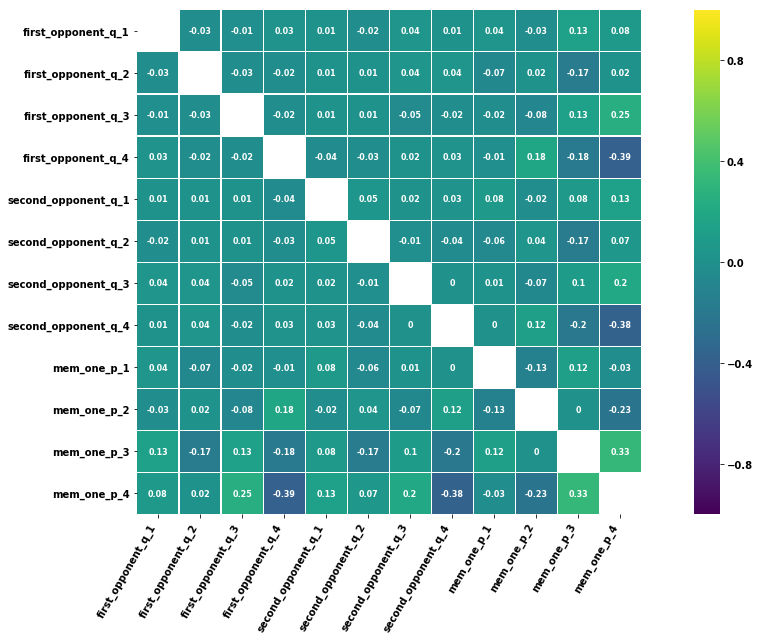

In [42]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

plt.savefig('../img/best_response_correlation.pdf')

In [43]:
columns = list(df.columns[1:-20]) + list(df.columns[13:17])

In [44]:
correlation = df[columns].corr().round(2)

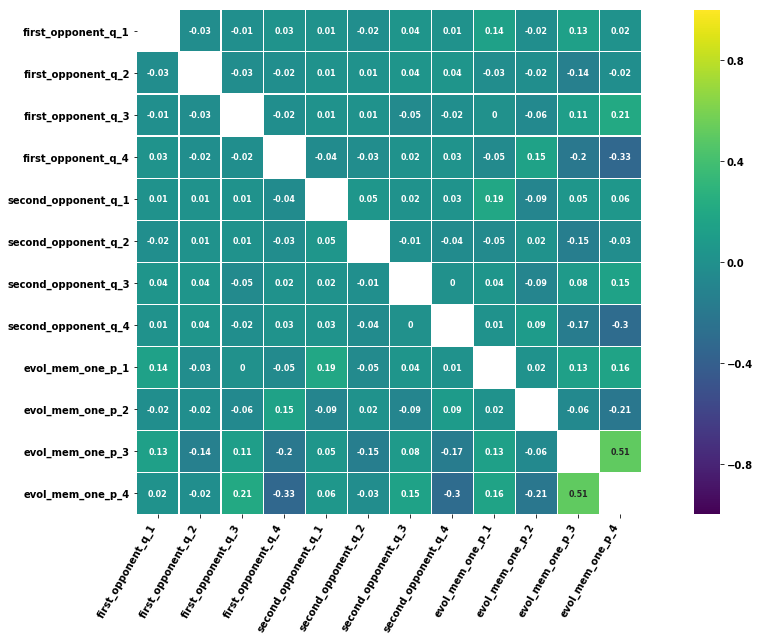

In [45]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

plt.savefig('../img/evo_correlation.pdf')

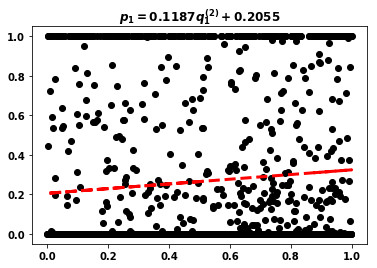

In [46]:
x = df['second_opponent_q_1']
y = df['mem_one_p_1']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.plot(x, y, 'o', color='black')
plt.plot(x, line, '--', color='red', linewidth=3);

plt.title(r'$p_1 = %.4f q^{(2)}_{1} + %.4f$' % (slope, intercept));

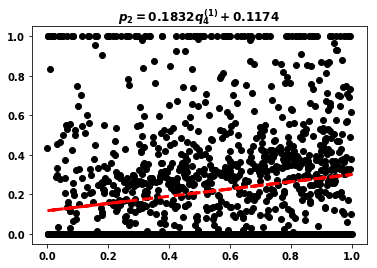

In [47]:
x = df['first_opponent_q_4']
y = df['mem_one_p_2']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.plot(x, y, 'o', color='black')
plt.plot(x, line, '--', color='red', linewidth=3);

plt.title(r'$p_2 = %.4f q^{(1)}_{4} + %.4f$' % (slope, intercept));


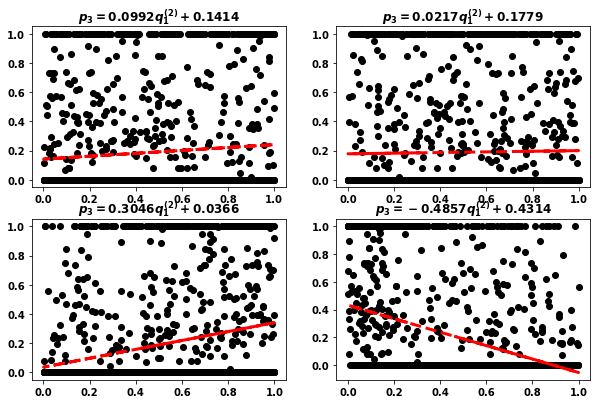

In [48]:
y = df['mem_one_p_4']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    x = df['first_opponent_q_{}'.format(i + 1)]


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    axes[index].plot(x, y, 'o', color='black')
    axes[index].plot(x, line, '--', color='red', linewidth=3);

    axes[index].set_title(r'$p_3 = %.4f q^{(2)}_{1} + %.4f$' % (slope, intercept));

Arcooding to (Knight 2019), a method for testing for extortionate behaviour has been given. Though there is a n exact condition that must hold regarding a player transition probabilities. A more slacked definition is also given. Regarding the slack defitition the error of being a ZD strategy is defined.

In [49]:
# ratios = []
# for p in range(4):
#     ratio = []
#     for _, row in df.iterrows():
#         try:
#             ratio.append(
#                 row["mem_one_p_{}".format(p + 1)]
#                 / row["evol_mem_one_p_{}".format(p + 1)]
#             )
#         except ZeroDivisionError:
#             pass
#     ratios.append(ratio)

In [50]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
# for i, ratio in enumerate(ratios):
#     index = (int(i / 2), i % 2)

#     axes[index].hist(ratio)
#     axes[index].axvline(
#         1, color="red", linestyle="dashed", linewidth=2, label="ratio=1"
#     )
#     axes[index].set_title(labels[i])
#     axes[index].legend()